In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/codebasics/py/master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv"

df = pd.read_csv(url)

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


handaling missing values

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.drop(columns=['society', 'balcony'], inplace=True)

In [ ]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

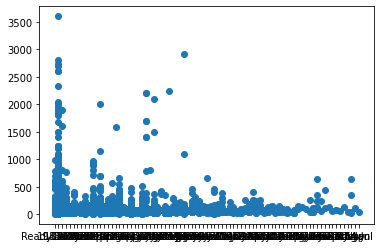

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(x=df['availability'], y=df['price'])

In [ ]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [ ]:
df.drop(columns=['availability'], inplace=True)

we can drop the nulls datas as it is much smaller than our data size

In [ ]:
df2 = df.dropna()

df2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


feature engineering

In [ ]:
df2['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
len(df2['location'].unique())

1304

In [ ]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split()[0]) ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df3 = df2.drop(columns=['size'])

df3.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


we can see that area_type is not affecting too much

In [ ]:
df3.drop(columns=['area_type'], inplace=True)

df3.describe()

,bath,price,bhk
count,13246.000000,13246.000000,13246.000000
mean,2.692586,112.389392,2.801902
std,1.341506,149.076587,1.295758
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [ ]:
df5 = df3.copy()
df5.total_sqft = df5.total_sqft.apply(convert_sqft_to_num)
df5 = df5[df5.total_sqft.notnull()]
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [ ]:
df5.describe()

,total_sqft,bath,price,bhk
count,13200.000000,13200.000000,13200.000000,13200.000000
mean,1555.302783,2.691136,112.276178,2.800833
std,1237.323445,1.338915,149.175995,1.292843
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1275.000000,2.000000,71.850000,3.000000
75%,1672.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


In [ ]:
df5['ppsf'] = df5['price']*100000/df5['total_sqft']

df5.head()

,location,total_sqft,bath,price,bhk,ppsf
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())
locations = df5.location.value_counts()
location_stats_less_than_10 = locations[locations <= 10]

In [ ]:
len(location_stats_less_than_10),locations.values.sum()

(1047, 13200)

In [ ]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

outlier handaling

normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [ ]:
df6 = df5[df5['total_sqft'] >= df5['bhk']*300]

df6.head()

,location,total_sqft,bath,price,bhk,ppsf
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df6['total_sqft'].mean()

1590.1899273442518

In [ ]:
def outlier_handle(df, column):
  df = df[df[column] < df[column].mean() + df[column].std()]
  df = df[df[column] > df[column].mean() - df[column].std()]
  return df

loca = df6.location.unique()
df8 = pd.DataFrame()
for loc in loca:
  df7 = outlier_handle(df6[df6['location']== loc], 'ppsf')
  df8 = pd.concat([df7,df8], ignore_index= True)

df8.shape, df6.shape

((9467, 6), (12456, 6))

In [ ]:
import numpy as np


def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.ppsf),
                'std': np.std(bhk_df.ppsf),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.ppsf<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df8)

df8.shape

(6630, 6)

In [ ]:
df9 = df8[df8['bath']<= df8['bhk']+2]

df9.shape

(6626, 6)

In [ ]:
df10 = df9.drop(['ppsf'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Kenchenahalli,1015.0,2.0,58.0,2
1,Kenchenahalli,715.0,1.0,45.0,1
2,Kenchenahalli,1150.0,2.0,58.0,2


In [ ]:
dummies = pd.get_dummies(df10['location'])

dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

df11.drop(columns=['location'], inplace=True)

df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1015.0,2.0,58.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,715.0,1.0,45.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1150.0,2.0,58.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1280.0,2.0,69.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,870.0,1.0,45.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df11['price']
x = df11.drop(['price'], axis = 1)

x.shape, y.shape

((6626, 243), (6626,))

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87844155, 0.81233684, 0.88912083, 0.86230748, 0.89146709])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

pra ={
    'linear':{
        'model': LinearRegression(),
        'para' : {}
    },
    'lasso' : {
        'model' : Lasso(),
        'para' : {
            'alpha' : [0.2,0.5,0.7,1,2]
        }
    },
    'Ridge' : {
        'model' : Ridge(),
        'para' : {
            'alpha' : [0.2,0.5,0.7,1,2]
        }
    },
    'DTR' : {
        'model' : DecisionTreeRegressor(),
        'para' : {
            'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"]
  
        }
    },
}

from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.87844155, 0.81233684, 0.88912083, 0.86230748, 0.89146709])

In [ ]:
scores = []

for data in pra:
  clf = GridSearchCV(pra[data]['model'],pra[data]['para'], cv=cv)
  clf.fit(x,y)
  scores.append({
      'model': data,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
    })

import pandas as pd

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,linear,0.866735,{}
1,lasso,0.799856,{'alpha': 0.2}
2,Ridge,0.866635,{'alpha': 0.2}
3,DTR,0.759698,{'criterion': 'squared_error'}


we can see that the linear regression is best predictor. so we will go with it.

In [ ]:
model = LinearRegression()

model.fit(x,y)

LinearRegression()

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    x = np.zeros(len(x.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [ ]:
import pickle

with open('/content/house_prediction.pickle','wb') as f:
    pickle.dump([model,predict_price],f)